# Exercises 02

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

## 02.1 - Computing via Monte Carlo $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$

This integral was estimated using Monte Carlo in three different ways. The uniform sampling is simply the evaluation of the integrand. The other two are two example of importance sampling, the first one used in a smart way, the other one in a bad way.

In the importance sampling we calculate the integral of a certain probability distribution multiplied by the integrand divided by the same distribution. Concretely, we generate points in which we evaluate the integrand/distribution distributed as the same distribution using the inverse of the cumulative function of the distribution.

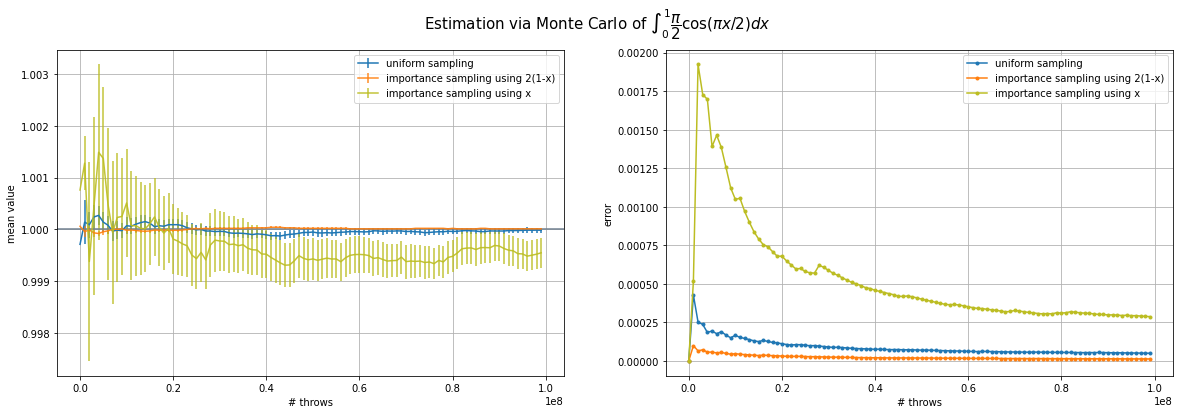

In [21]:
path = "Es1/File.out"

M, N = np.loadtxt(path, usecols=(0, 1), delimiter=' ', unpack='true', max_rows=1)

ave1, ave2, ave3, std1, std2, std3 = np.loadtxt(path, usecols=(0, 1, 2 , 3, 4, 5), delimiter=' ', unpack='true', skiprows=1)

x = np.arange(N)
L=int(M/N)
x*=L # Number of throws = block * (Number of throws in each block)

fig, ((ax1,ax2))=plt.subplots(1, 2, figsize = (20,6))
fig.suptitle("Estimation via Monte Carlo of $\int_0^1 \dfrac{\pi}{2}\cos(\pi x/2) dx $", size=15)

ax1.errorbar(x,ave1,yerr=std1, label = "uniform sampling")
ax1.errorbar(x,ave2,yerr=std2, label = "importance sampling using 2(1-x)", alpha= 0.9)
ax1.errorbar(x,ave3,yerr=std3, label = "importance sampling using x", alpha= 0.9, c ="tab:olive")
ax1.axhline(y=1, color = 'slategray')
ax1.set_xlabel('# throws')
ax1.set_ylabel('mean value')
ax1.grid(True)
ax1.legend()

ax2.plot(x, std1, label ="uniform sampling", marker =".")
ax2.plot(x, std2, label = "importance sampling using 2(1-x)", marker =".")
ax2.plot(x, std3, label = "importance sampling using x", marker =".", c="tab:olive")
ax2.grid(True)
ax2.legend()
ax2.set_xlabel('# throws')
ax2.set_ylabel('error')

plt.show()

For all samplings the integral is in accordance with the expected value.

The first importance sampling was done using a distribution that behaves as a line through the starting and ending value of the function to be integrated (i.e. 2(1-x)).

The second importance sampling was done using a distribution that does not follow the function at all (i.e. x) and is therefore a worse choice even than the uniform sampling.

As expected the first importance sampling has smaller error bars and converges faster than the other two. The more the distribution is similar to the integrand the smaller the errors.

## 02.2 - Study of 3D Random Walks

In [3]:
def function (x, k):
    return k*pow(x,0.5);

Simulation of a RW in a cubic lattice with lattice constant 1 and in which the walker at every discrete time makes a step forward or back in one of the three principal directions.

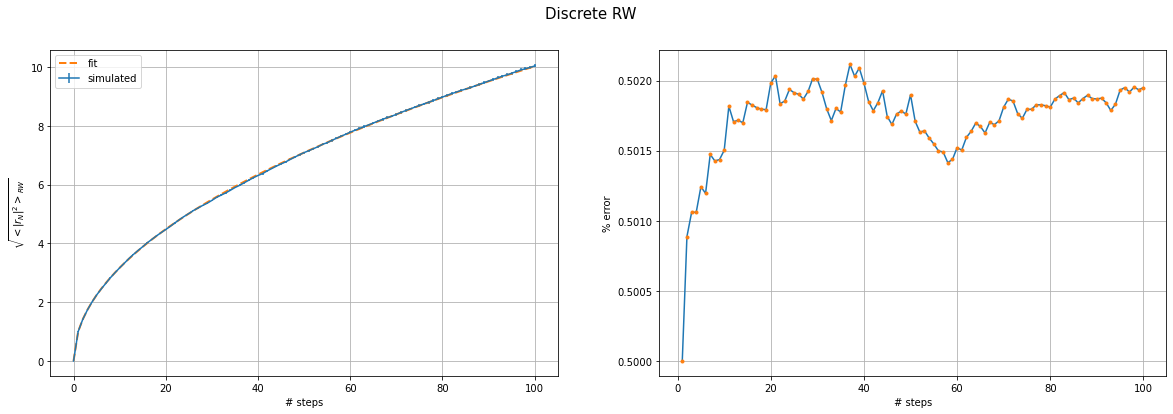

In [53]:
path = "Es2/Discrete_RW.out"

M, N, L = np.loadtxt(path, usecols=(0, 1, 2), delimiter=' ', unpack='true', max_rows=1)

d, err = np.loadtxt(path, usecols=(0, 1), delimiter=' ', unpack='true', skiprows=1)

perc=100*np.divide(err[1:], d[1:])

x = np.arange(L+1)

fig, ((ax1,ax2))=plt.subplots(1, 2, figsize = (20,6))

fig.suptitle("Discrete RW", size=15)

ax1.errorbar(x,d,yerr=err, label = 'simulated')
ax1.set_xlabel('# steps')
ax1.set_ylabel('$\sqrt{<|r_N|^2 >_{RW}}$')
ax1.grid(True)

pars, cov = curve_fit(f=function, xdata=x, ydata=d, p0=[1], bounds=(-np.inf, np.inf))
ax1.plot(x, function(x, *pars), linestyle='--', linewidth=2, label = "fit")
ax1.legend()

ax2.plot(x[1:], perc, marker= '.', mfc='tab:orange', mec='tab:orange')
ax2.grid(True)
ax2.set_xlabel('# steps')
ax2.set_ylabel('% error')

plt.show()

Simulation of a RW in the continuum in which the walker at every discrete time makes a step of leght 1 in any direction in space. It had to be taken in account the Jacobian of the spherical coordinates, therefore $\theta$ did not have to be uniformly distributed, but rather its cosine did.

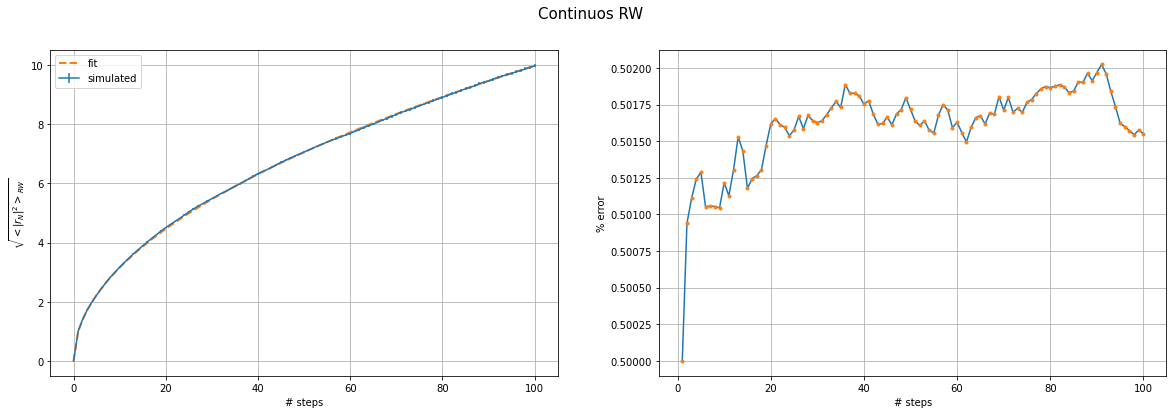

In [48]:
path = "Es2/Continuos_RW.out"

M, N, L = np.loadtxt(path, usecols=(0, 1, 2), delimiter=' ', unpack='true', max_rows=1)

d, err = np.loadtxt(path, usecols=(0, 1), delimiter=' ', unpack='true', skiprows=1)

perc=100*np.divide(err[1:], d[1:])

fig, ((ax1,ax2))=plt.subplots(1, 2, figsize = (20,6))

x = np.arange(L+1)

fig.suptitle("Continuos RW", size=15)

ax1.errorbar(x,d,yerr=err, label = "simulated")
ax1.set_xlabel('# steps')
ax1.set_ylabel('$\sqrt{<|r_N|^2 >_{RW}}$')
ax1.grid(True)

pars, cov = curve_fit(f=function, xdata=x, ydata=d, p0=[1], bounds=(-np.inf, np.inf))
ax1.plot(x, function(x, *pars), linestyle='--', linewidth=2, label="fit")
ax1.legend()

ax2.plot(x[1:], perc, marker= '.',  mfc='tab:orange', mec='tab:orange')
ax2.grid(True)
ax2.set_xlabel('# steps')
ax2.set_ylabel('% error')

plt.show()

Both simulations follow the expected behaviour of $\sqrt{N}$. In both cases it also shows a diffusive behaviour which intuitively it means that we get farther and farther away from the origin as time passes.

More mathematically, we can formulate this problem as a Markov chain and therefore calculate the transition probability, which after a few steps gives us the equation $\dfrac{\partial \rho}{\partial t} = D\nabla^2\rho$ with $D = \dfrac{a^2}{2 \tau}$ (where a is the lattice constant and $\tau$ is the time step). This is a diffusion equation that we can solve analitically after imposing the initial condition ($(\vec x, 0)=(\vec 0, 0)$). The solution is then $\rho(\vec x, t)=\dfrac{1}{\sqrt 4 \pi D t} e^{\frac{-x^2}{4 D t}}$, from which we can easily derive $<|\vec x(t)|^2> = 2Dt=2 \dfrac{a^2}{2 \tau} N \tau =a^2 N$. Given that in our case a = 1, we get why the expected behaviour is $\sqrt{N}$.

